# Alumnae skills

Author: Andrea Mock

This notebook will focus on analyzing the skills alumnae bring with them and see if there are any patterns that can be detected. We use data collected from alumnae from Linkedin, where one of the fields individuals can fill in include the skills they pocess. We will use these listed skills as the starting point of our analysis.

## Part 1: Loading data and exploring skills.
We first read in the data that contains all the Linkedin profiles of Wellesley CS alumae. Specificallhy focusing on their skills we can see then determine the number of unique and total number of skills. 

In [1]:
# load necessary libraries
import pandas as pd

In [2]:
# load data
alum_df = pd.read_pickle('alum_data')

In [44]:
# take a look at what our dataset contains
alum_df.head()

As we can see our dataset contains a lot of information. Here we want to focus specifically on the skills column of each alum. To start we want to familiarize ourselves with the skills alums list and the number of skills people list.
In general, most people list around 18 skills on their profile, with the maximum number of skills someone listed being 50.

In [4]:
# determining how many skills each person lists
numSkills = alum_df['skills'].apply(lambda x: len(x))
numSkills

0       3
1      26
2      22
3      48
4       0
       ..
603     4
604     7
605    13
606    12
607    30
Name: skills, Length: 608, dtype: int64

In [5]:
numSkills.describe()

count    608.000000
mean      18.574013
std       12.115498
min        0.000000
25%       10.000000
50%       17.000000
75%       26.000000
max       50.000000
Name: skills, dtype: float64

In [6]:
def uniqueSkills(skills):
    """
    goes through a vector of skills and creates a unique list of skills that are presented
    """
    skillSet = set()
    for i in range(len(skills)):
        for j in range(len(skills[i])):
            skillSet.add(skills[i][j])
    return skillSet

In [7]:
unique_skills = uniqueSkills(alum_df['skills']) # determine the number of unique skills mentioned
len(unique_skills) 

2386

In [8]:
def getSkills(skills):
    """
    returns a list of all skills that alumnae listed on their profiles
    """
    return [skills[i][j] for i in range(len(skills)) for j in range(len(skills[i]))]

In [9]:
all_skills = getSkills(alum_df['skills']) # totality of skills in list format including duplicates
len(all_skills)

11293

We find out that there are 2368 total unique skills that are listed. In total there are 11293 skills listed. In the next step, let's see if there are any skills in particular that people list.

## Part 2: Plotting most frequent skills
From all the skills we can create a Counter dictionary that includes the number of times a particular skill appears. We then plot the most common skills.

In [10]:
from collections import Counter
# create a counter of occurences of skills
skills_count = Counter(all_skills)

In [11]:
# example of a skill and counts
skills_count['Data Analysis']

148

In [12]:
# the twenty most common skills mentioned
skills_count.most_common(20)

[('Java', 318),
 ('Python', 262),
 ('JavaScript', 240),
 ('HTML', 222),
 ('Research', 215),
 ('Microsoft Office', 197),
 ('Public Speaking', 180),
 ('CSS', 160),
 ('Data Analysis', 148),
 ('Microsoft Excel', 145),
 ('Social Media', 133),
 ('Leadership', 133),
 ('SQL', 127),
 ('Software Development', 103),
 ('Microsoft Word', 102),
 ('PowerPoint', 96),
 ('Project Management', 92),
 ('Management', 87),
 ('Teamwork', 84),
 ('Editing', 83)]

In [13]:
top_skills_df = pd.DataFrame(skills_count.most_common(20),
                             columns=['skill', 'count'])
top_skills_df.head() # visualization of the top skills

,skill,count
0,Java,318
1,Python,262
2,JavaScript,240
3,HTML,222
4,Research,215


In [14]:
import matplotlib.pyplot as plt

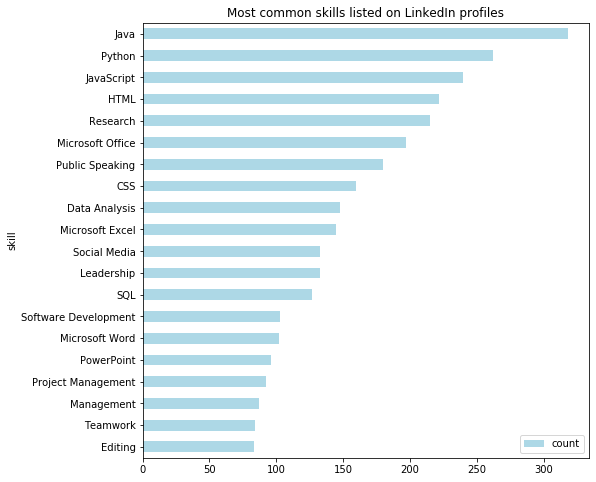

In [15]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
top_skills_df.sort_values(by='count').plot.barh(x='skill',
                      y='count',
                      ax=ax,
                      color="lightblue")

ax.set_title("Most common skills listed on LinkedIn profiles")

plt.show()

## Part 3: Creating word clouds

Plotting the most common skills may offer a window into what skills alumnae pocess. However, as we can see there are skills that have particualar similarities, such as Microsoft Word and Microsoft Office as Word is part of the Microsoft Office suite. Thus, we use a different visualization form, a word cloud to find the words/skills most frequently present.

In [16]:
# importing wordcloud to create word cloud
from wordcloud import WordCloud, STOPWORDS 
import nltk

In [17]:
def createWordCloud(text, stopwords):
    """
    plots a wordcloud of a given text and excludes the given stopwords
    """
    
    wordcloud = WordCloud( 
                stopwords = stopwords,
                min_font_size = 10).generate(text) 
    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show() 

In [18]:
# merge the skills to a string
all_skills_string = " ".join(all_skills)

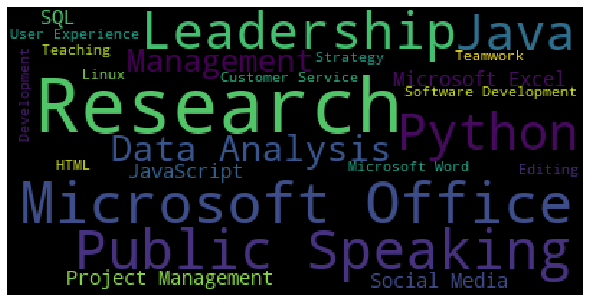

In [19]:
createWordCloud(all_skills_string, STOPWORDS)

Aside from listed skills, many alums included a small blurb about themselves on their profiles. In a next step we will examine these and see if there are any patterns that can be decerned. 

In [20]:
alum_df['summary']

0      I’m a Senior Experience Designer at ThoughtWor...
1                                                       
2                                                       
3      My career goal is to discover various usages o...
4                                                       
                             ...                        
603                                                     
604                           https://www.zoelallen.com/
605                                                     
606                                                     
607    develop and support online business with web d...
Name: summary, Length: 608, dtype: object

In [21]:
import re

In [22]:
def preprocessing(text):
    """
    cleans the text, removes different symbols and punctuation
    """
    text = " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", text).split())
    punctuations = '''!()-![]{};:+\",<>./?@#$%^&*_~'''
    text = ''.join([i for i in text if not i in punctuations]) # removes punctuation
    text = text.lower() #lower all words
    return text

In [23]:
# clean the text 
processed_summary = alum_df['summary'].apply(lambda x: preprocessing(x))
processed_summary[0] # cleaned text

'i m a senior experience designer at thoughtworks inc i ve had the pleasure of exploring many different domains challenges while doing design consulting work for the past 4 5 years my passion is in understanding the human aspect of design i love speaking with people to understand what drives them and what inspires them i enjoy being involved in projects that aim to help underserved groups of people in even the smallest ways because i believe that s where the biggest difference can happen'

In [24]:
# create one big string including summaries from alumnae
summary_str = " ".join(processed_summary)

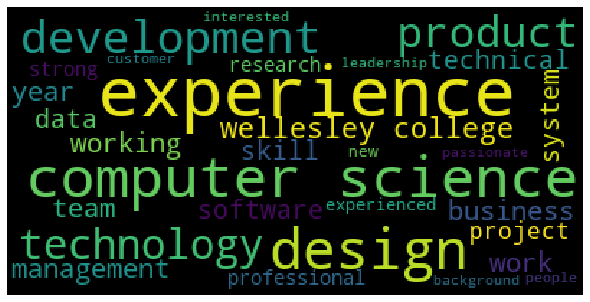

In [25]:
# create word cloud for summary data
createWordCloud(summary_str, STOPWORDS)

Similarly some alumnae have added a discription to the job that they have been doing at their last place of employment. We also take a look at the words and descriptions used in this context.

In [26]:
def processDescription(descr):
    if type(descr) == str:
        return preprocessing(descr)
    return ''

In [27]:
processed_descr = alum_df['description'].apply(lambda x: processDescription(x))
processed_descr[3] # cleaned text

'6 000 qualified leads on a daily basis onboarded and trained 15 of our employees in sales marketing and engineering ensuring a successful adoption of hubspot finalized db schema and system design built out our offboarding and hubspot api call strategy formalized and managed our hubspot integration for lead generation data cleanup parsing data consolidation'

In [28]:
description_str = " ".join(processed_descr)

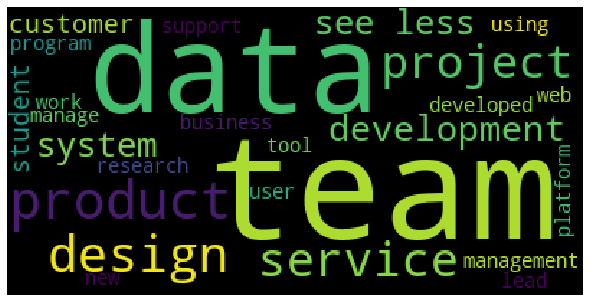

In [29]:
createWordCloud(description_str, STOPWORDS)

## Part 4: Topic modeling
In this step we perform topic modeling of the summary on alumnae's profiles to examine if there are particular topics alums like to mention in their profiles. Topic modeling is an unsupervised learning algorithm that allows to indentify topics within texts. We thus  the Python library pyLDAvis that uses Latent Dirichlet Allocation, a type of topic modeling.

In [31]:
# import necessary libraries 
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [32]:
# create vectorizer object
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)

In [33]:
# convert the documents into a document-term matrix
dtm_tf= tf_vectorizer.fit_transform(processed_descr)


# retrieve the terms found in the corpora
tokens = tf_vectorizer.get_feature_names()

In [34]:
tokens[:5] # some of the terms identified

['academic', 'analysis', 'analytics', 'app', 'application']

In [40]:
# use the Tfidf scores instead of Tf in the document-term matrix
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
dtm_tfidf= tfidf_vectorizer.fit_transform(processed_descr)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:1817: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning)


In [36]:
def wm2df(wm, feat_names):
    """ 
    creates a document term matrix dataframe from a document term matrix and corresponding features
    """
    # create an index for each row
    doc_names = ['Doc{:d}'.format(idx) for idx, _ in enumerate(wm)]
    df = pd.DataFrame(data=wm.toarray(), index=doc_names,
                      columns=feat_names)
    return(df)

In [38]:
dataframe_summary = wm2df(dtm_tf, tokens)

In [39]:
dataframe_summary.head()

,academic,analysis,analytics,app,application,applications,areas,based,best,build,...,user,users,using,various,web,website,work,working,writing,year
Doc0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Doc1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Doc2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Doc3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Doc4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now we fit two LDA models, each with 3 topics each:

In [41]:
# for TF DTM
lda_tf = LatentDirichletAllocation(n_components=3, random_state=0)
lda_tf.fit(dtm_tf)

# for TFIDF DTM
lda_tfidf = LatentDirichletAllocation(n_components=3, random_state=0)
lda_tfidf.fit(dtm_tfidf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=3, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [42]:
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.066077 -0.148798       1        1  39.639631
0     -0.168405  0.019923       2        1  35.750983
2      0.102327  0.128875       3        1  24.609387, topic_info=         Term       Freq      Total Category  logprob  loglift
90    product  54.000000  54.000000  Default  30.0000  30.0000
28       data  80.000000  80.000000  Default  29.0000  29.0000
134       web  36.000000  36.000000  Default  28.0000  28.0000
121      team  77.000000  77.000000  Default  27.0000  27.0000
86   platform  25.000000  25.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
136      work  12.305860  40.910876   Topic3  -4.0902   0.2007
110  software  10.653616  32.582230   Topic3  -4.2344   0.2842
99    quality   8.353944  23.019370   Topic3  -4.4776   0.3884
26   customer   8.385998  33.506992   Topic3  -4.4738   0.0169
31     design   8.554732  67.431759   Topic3  -4.4538  -0.6626

[154 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
0         2  0.932121  academic
1         1  0.227977  analysis
1         2  0.227977  analysis
1         3  0.501549  analysis
3         3  0.963624       app
...     ...       ...       ...
137       2  0.435527   working
137       3  0.508114   working
139       1  0.261857      year
139       2  0.104743      year
139       3  0.628458      year

[239 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3])

In [43]:
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.124374 -0.088504       1        1  38.142724
0     -0.147639 -0.052361       2        1  38.040933
2      0.023264  0.140865       3        1  23.816343, topic_info=            Term       Freq      Total Category  logprob  loglift
90       product   9.000000   9.000000  Default  30.0000  30.0000
28          data  12.000000  12.000000  Default  29.0000  29.0000
86      platform   6.000000   6.000000  Default  28.0000  28.0000
66      learning   6.000000   6.000000  Default  27.0000  27.0000
37   development   9.000000   9.000000  Default  26.0000  26.0000
..           ...        ...        ...      ...      ...      ...
130         user   2.839770   7.964181   Topic3  -4.0260   0.4036
126        tools   1.885995   5.365304   Topic3  -4.4353   0.3893
137      working   2.273349   8.892501   Topic3  -4.2485   0.0708
1       analysis   1.742350   5.655355   Topic3  -4.5145   0.2574
132        using   1.923554   7.283195   Topic3  -4.4155   0.1034

[138 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
1         1  0.530471   analysis
1         2  0.176824   analysis
1         3  0.353647   analysis
2         2  0.765008  analytics
3         3  0.949885        app
...     ...       ...        ...
137       2  0.674726    working
137       3  0.224909    working
138       1  0.805609    writing
139       1  0.697487       year
139       3  0.232496       year

[164 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3])